In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12380, 6)
2020 (14888, 6)


In [42]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [43]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
215,DF,OUTRAS,DOMICILIO,< 9,M,2
1642,RS,PNEUMONIA,IGNORADO,10 - 19,F,1
823,RS,OUTRAS,OUTROS_SERVICOS_SAUDE,< 9,M,11
9805,RS,INSUFICIENCIA_RESPIRATORIA,OUTRO,70 - 79,F,2
12321,MS,OUTRAS,HOSPITAL,90 - 99,F,205


In [44]:
print(f"Quantidades de Estados em 2019: {len(dados_2019['uf'].unique())}")
print(f"Quantidades de Estados em 2020: {len(dados_2020['uf'].unique())}")

Quantidades de Estados em 2019: 27
Quantidades de Estados em 2020: 27


In [45]:
print(f"Doenças relacionadas em 2019: -> {dados_2019['tipo_doenca'].unique()}")
print(f"Doenças relacionadas em 2020: -> {dados_2020['tipo_doenca'].unique()}")

Doenças relacionadas em 2019: -> ['OUTRAS' 'INDETERMINADA' 'INSUFICIENCIA_RESPIRATORIA' 'PNEUMONIA'
 'SEPTICEMIA' 'SRAG' 'COVID']
Doenças relacionadas em 2020: -> ['OUTRAS' 'COVID' 'INDETERMINADA' 'INSUFICIENCIA_RESPIRATORIA' 'PNEUMONIA'
 'SEPTICEMIA' 'SRAG']


In [46]:
total_de_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_de_obitos_2019


,total
tipo_doenca,
COVID,1
INDETERMINADA,6986
INSUFICIENCIA_RESPIRATORIA,100518
OUTRAS,660057
PNEUMONIA,226216
SEPTICEMIA,175451
SRAG,1498


In [47]:
total_de_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_de_obitos_2020

,total
tipo_doenca,
COVID,194779
INDETERMINADA,9659
INSUFICIENCIA_RESPIRATORIA,98535
OUTRAS,686973
PNEUMONIA,181406
SEPTICEMIA,162236
SRAG,16488


In [48]:
proporcao = total_de_obitos_2020/total_de_obitos_2019
proporcao

,total
tipo_doenca,
COVID,194779.000000
INDETERMINADA,1.382622
INSUFICIENCIA_RESPIRATORIA,0.980272
OUTRAS,1.040778
PNEUMONIA,0.801915
SEPTICEMIA,0.924680
SRAG,11.006676


In [67]:
total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
total_2020.loc['AC', "SRAG"]

total    29
Name: (AC, SRAG), dtype: int64

In [68]:
def grafico_comparativo(causa, estado="BRASIL"):

    if estado == "BRASIL":
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

    else:
        total_2019 = dados_2019.groupby(["uf","tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf","tipo_doenca"]).sum()
        lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]

    dados = pd.DataFrame({"Total": lista, "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x="Ano", y="Total", data=dados)
    plt.title(f"Óbitos por {causa} - {estado}")
    plt.show()

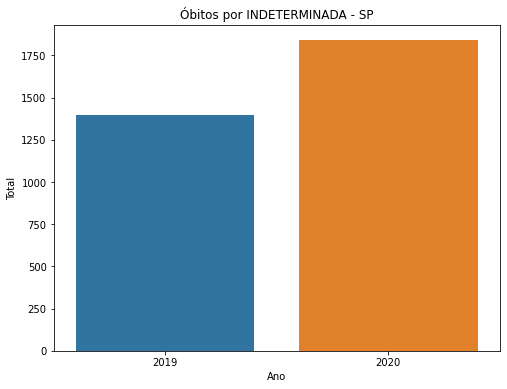

In [75]:
grafico_comparativo("INDETERMINADA", "SP")

## Desafio 01: Acessar o portal e verificar como são classificados os dados

## Desafio 02: Corrigir o erro do Thiago na contagem de classificados

## Desafio 03: Explorar os outros campos da base

## Desafio 04: Add na função a opção de filtrar por estado